Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


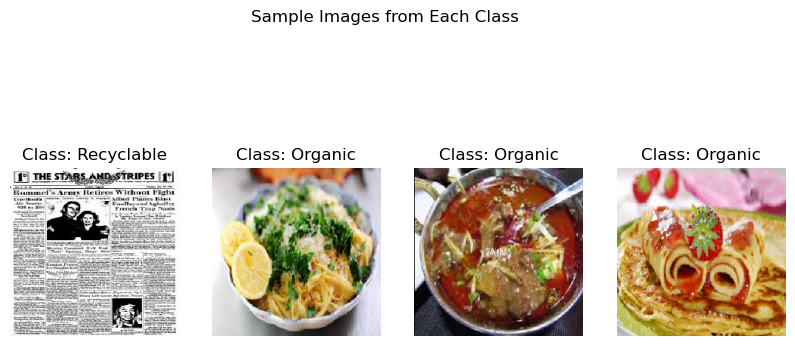

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = r"C:\Users\ACER\Downloads\archive (2)\DATASET\DATASET"
train_dir = base_dir + r"\TRAIN"
test_dir = base_dir + r"\TEST"
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

plt.figure(figsize=(10, 5))
for i in range(4):
    image, label = next(train_data)
    plt.subplot(1, 4, i+1)
    plt.imshow(image[0])
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [52]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2,
)
model.save('mobilenet_waste_classifier.h5')
loss, accuracy=model.evaluate(test_data)
print("Model Accuracy:",accuracy)

Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 481s 612ms/step - accuracy: 0.8673 - loss: 0.3132 - val_accuracy: 0.8739 - val_loss: 0.2765
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 421s 596ms/step - accuracy: 0.9349 - loss: 0.1681 - val_accuracy: 0.8770 - val_loss: 0.2772


79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 530ms/step - accuracy: 0.8734 - loss: 0.2692
Model Accuracy: 0.87703937292099


In [54]:
#evaluate model
from sklearn.metrics import classification_report, confusion_matrix
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_data.classes
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Organic', 'Recyclable']))
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 571ms/step
Classification Report:
               precision    recall  f1-score   support

     Organic       0.56      0.65      0.60      1401
  Recyclable       0.44      0.35      0.39      1112

    accuracy                           0.52      2513
   macro avg       0.50      0.50      0.49      2513
weighted avg       0.50      0.52      0.51      2513

Confusion Matrix:
 [[912 489]
 [728 384]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


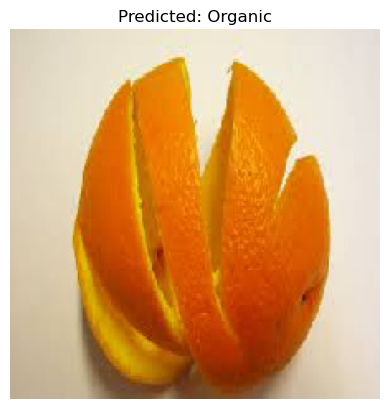

In [56]:
#testing data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
model_path = 'mobilenet_waste_classifier.h5'
test_image_path = r"C:\Users\ACER\Downloads\archive (2)\DATASET\TEST\O\O_13762.jpg"
model = tf.keras.models.load_model(model_path)
test_img = load_img(test_image_path, target_size=(224, 224))
test_img_array = img_to_array(test_img) / 255.0
test_img_array = np.expand_dims(test_img_array, axis=0)

predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()